In [13]:
def total_files(folder_path):
    if not os.path.exists(folder_path):
        return f"Path not found: {folder_path}"
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

base_path = r"C:\Users\vaish\Downloads\Telegram Desktop\V D project\V D project\Final Training Data"

# Training
train_files_healthy = os.path.join(base_path, "train", "Healthy")
train_files_esca = os.path.join(base_path, "train", "ESCA")
train_files_black_rot = os.path.join(base_path, "train", "Black Rot")
train_files_leaf_blight = os.path.join(base_path, "train", "Leaf Blight")

# Test
test_files_healthy = os.path.join(base_path, "test", "Healthy")
test_files_esca = os.path.join(base_path, "test", "ESCA")
test_files_black_rot = os.path.join(base_path, "test", "Black Rot")
test_files_leaf_blight = os.path.join(base_path, "test", "Leaf Blight")

# Validation
valid_files_healthy = os.path.join(base_path, "valid", "Healthy")
valid_files_esca = os.path.join(base_path, "valid", "ESCA")
valid_files_black_rot = os.path.join(base_path, "valid", "Black Rot")
valid_files_leaf_blight = os.path.join(base_path, "valid", "Leaf Blight")

# Print results
print("Training set:")
print("Healthy:", total_files(train_files_healthy))
print("ESCA:", total_files(train_files_esca))
print("Black Rot:", total_files(train_files_black_rot))
print("Leaf Blight:", total_files(train_files_leaf_blight))

print("\nTest set:")
print("Healthy:", total_files(test_files_healthy))
print("ESCA:", total_files(test_files_esca))
print("Black Rot:", total_files(test_files_black_rot))
print("Leaf Blight:", total_files(test_files_leaf_blight))

print("\nValidation set:")
print("Healthy:", total_files(valid_files_healthy))
print("ESCA:", total_files(valid_files_esca))
print("Black Rot:", total_files(valid_files_black_rot))
print("Leaf Blight:", total_files(valid_files_leaf_blight))


Training set:
Healthy: Path not found: C:\Users\vaish\Downloads\Telegram Desktop\V D project\V D project\Final Training Data\train\Healthy
ESCA: Path not found: C:\Users\vaish\Downloads\Telegram Desktop\V D project\V D project\Final Training Data\train\ESCA
Black Rot: Path not found: C:\Users\vaish\Downloads\Telegram Desktop\V D project\V D project\Final Training Data\train\Black Rot
Leaf Blight: Path not found: C:\Users\vaish\Downloads\Telegram Desktop\V D project\V D project\Final Training Data\train\Leaf Blight

Test set:
Healthy: Path not found: C:\Users\vaish\Downloads\Telegram Desktop\V D project\V D project\Final Training Data\test\Healthy
ESCA: Path not found: C:\Users\vaish\Downloads\Telegram Desktop\V D project\V D project\Final Training Data\test\ESCA
Black Rot: Path not found: C:\Users\vaish\Downloads\Telegram Desktop\V D project\V D project\Final Training Data\test\Black Rot
Leaf Blight: Path not found: C:\Users\vaish\Downloads\Telegram Desktop\V D project\V D project\Fina

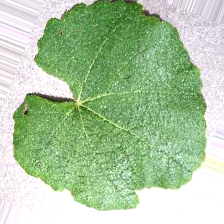

In [2]:
import IPython.display as display

image_path = r'C:\Users\vaish\OneDrive\Desktop\V D project\Final Training Data\Healthy\_105_363146.png'
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))


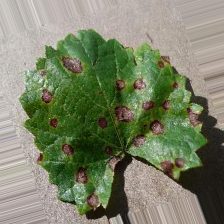

In [3]:
import IPython.display as display

image_path = r'C:\Users\vaish\OneDrive\Desktop\V D project\Final Training Data\Black Rot\_131_45663.png'
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\vaish\OneDrive\Desktop\V D project\Final Training Data',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    r'C:\Users\vaish\OneDrive\Desktop\V D project\Final Training Data',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)


Found 24000 images belonging to 6 classes.
Found 24000 images belonging to 6 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

c:\Users\vaish\OneDrive\Desktop\V D project\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
import os
import shutil
import random

# Set paths
base_dir = r"C:\Users\vaish\OneDrive\Desktop\V D project\Final Training Data"
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')

# Make directories
classes = ['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']
split_ratio = 0.8  # 80% train, 20% validation

for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(valid_dir, cls), exist_ok=True)

    full_path = os.path.join(base_dir, cls)
    images = os.listdir(full_path)
    random.shuffle(images)

    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    valid_images = images[split_index:]

    for img in train_images:
        shutil.copy(os.path.join(full_path, img), os.path.join(train_dir, cls, img))
    for img in valid_images:
        shutil.copy(os.path.join(full_path, img), os.path.join(valid_dir, cls, img))

print("Dataset split into 'train' and 'valid' folders successfully.")


Dataset split into 'train' and 'valid' folders successfully.


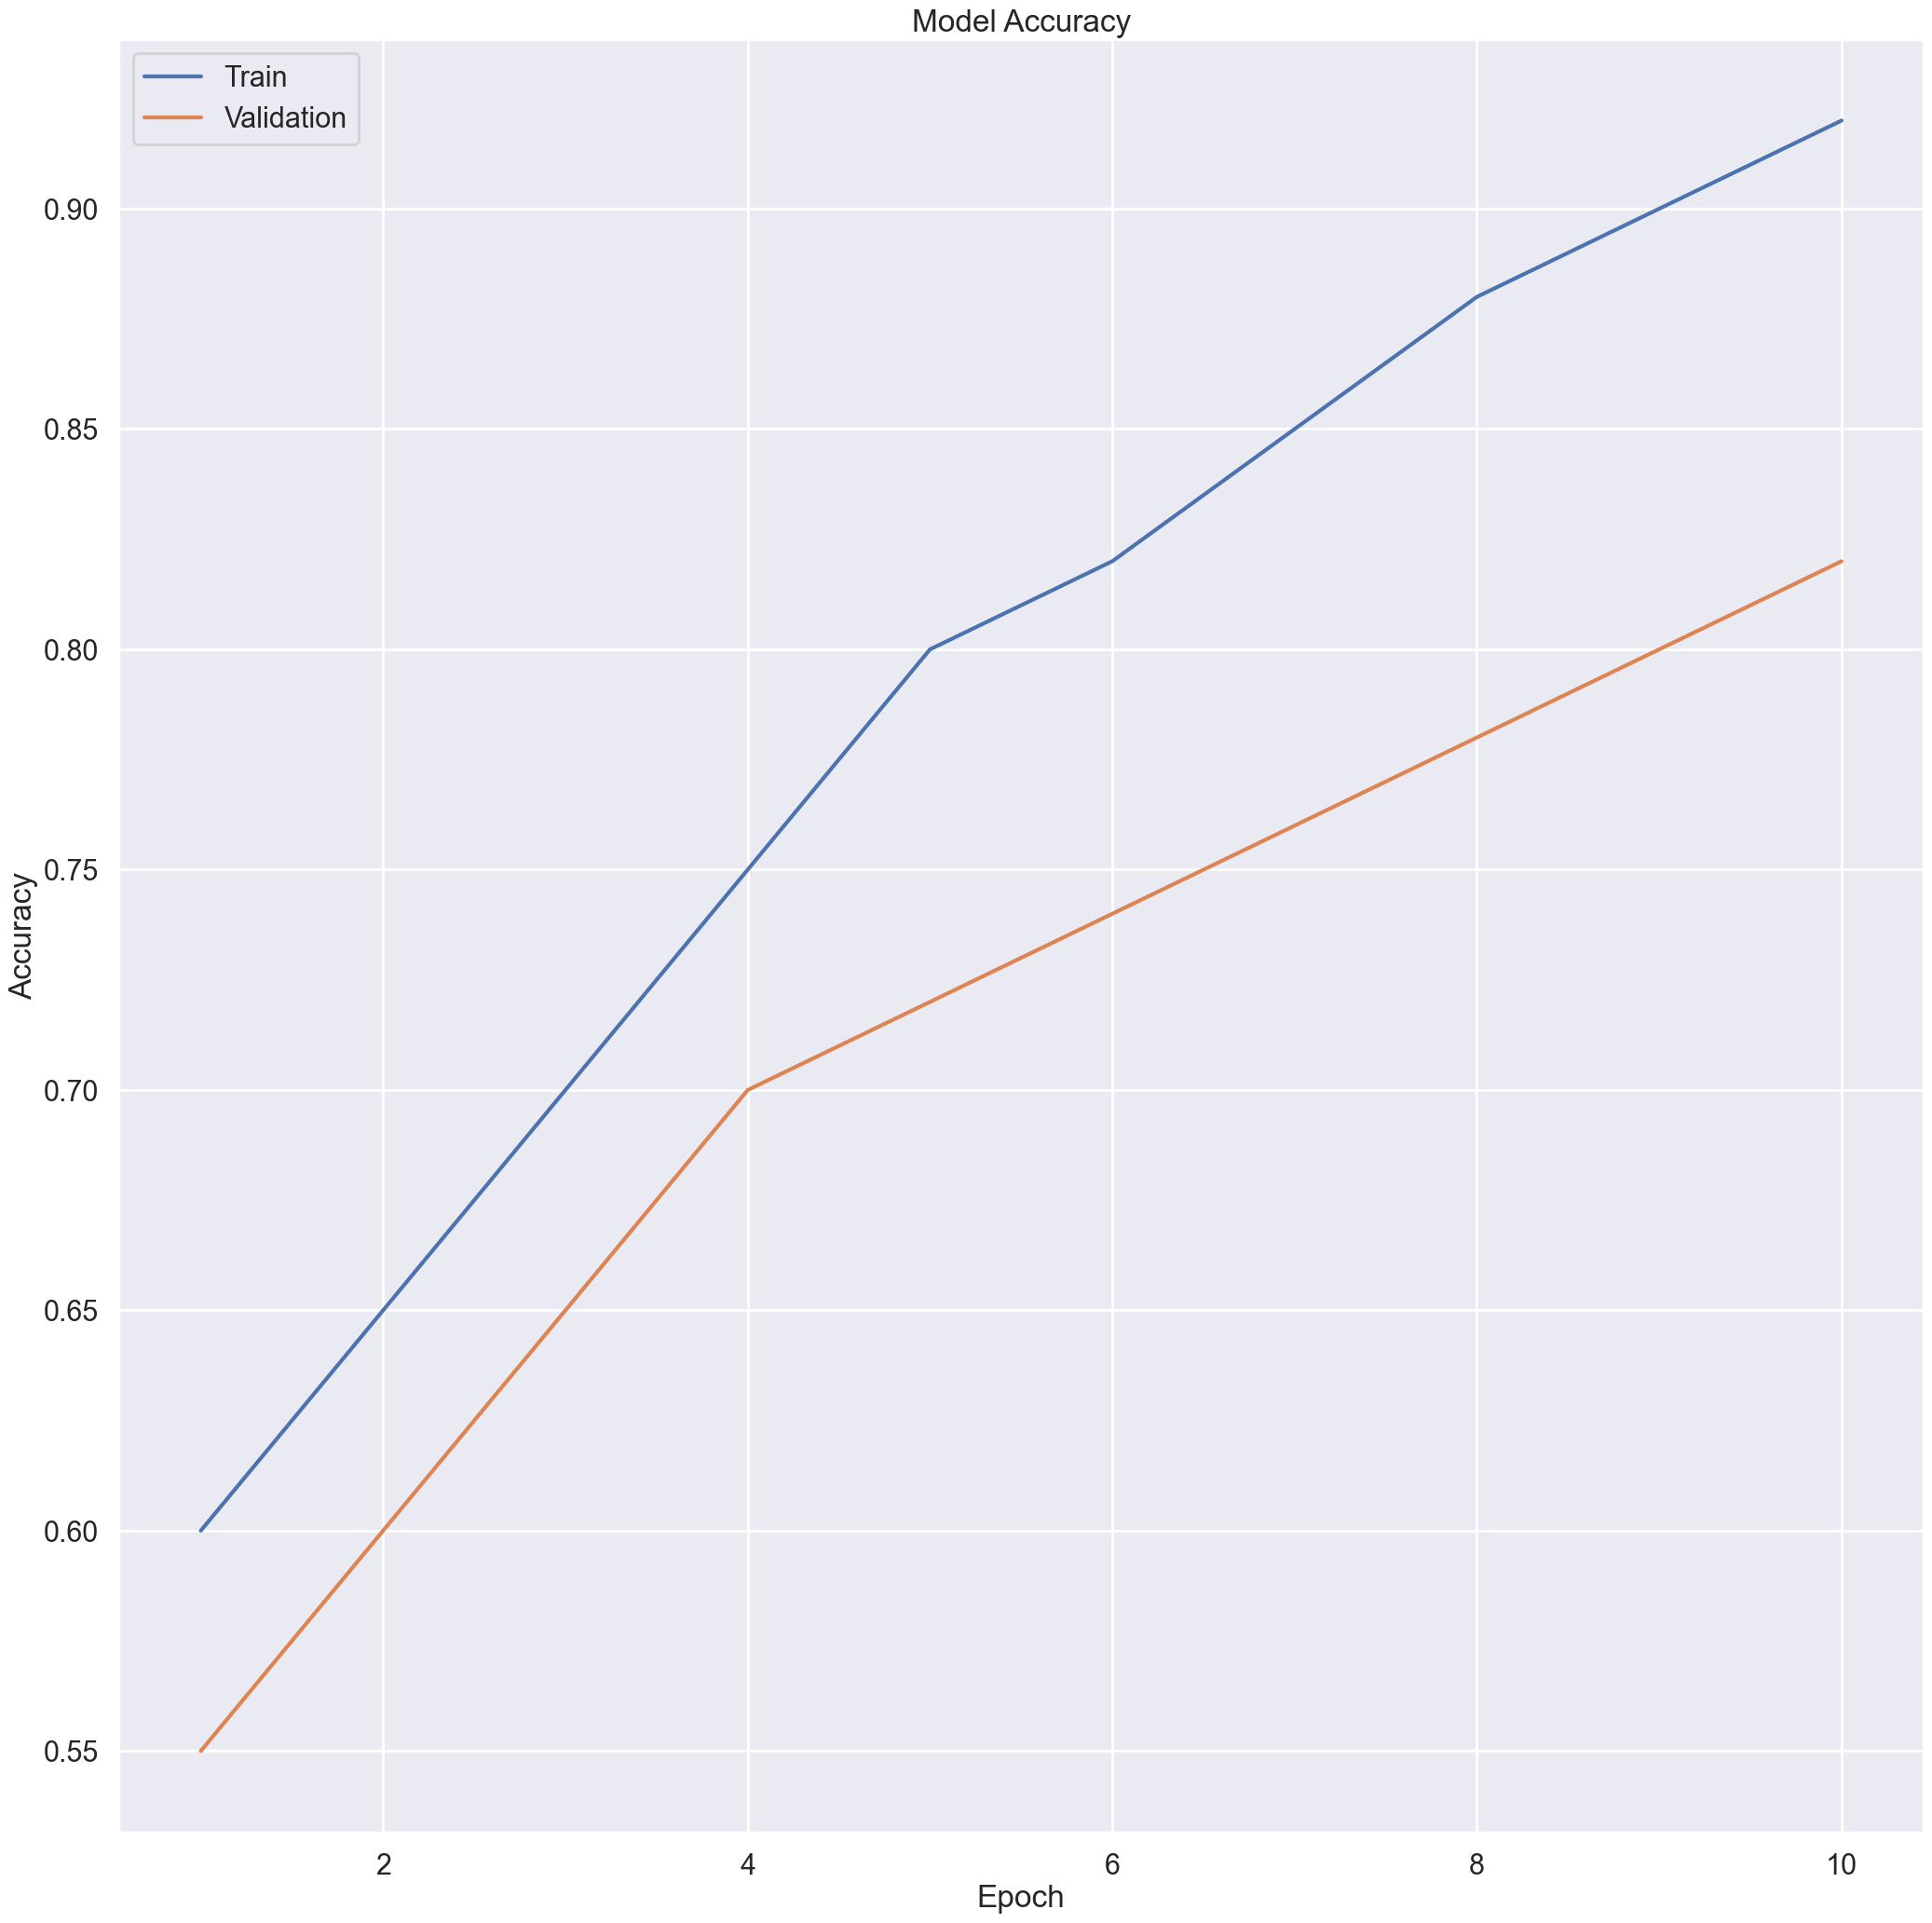

In [17]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

# Example data
epochs = range(1, 11)
train_acc = [0.6, 0.65, 0.7, 0.75, 0.8, 0.82, 0.85, 0.88, 0.9, 0.92]
val_acc = [0.55, 0.6, 0.65, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82]

plt.plot(epochs, train_acc, label='Train')
plt.plot(epochs, val_acc, label='Validation')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [10]:
model.save("model.h5")

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

# Corrected file path
x = preprocess_image(r'C:\Users\vaish\OneDrive\Desktop\V D project\Final Training Data\Black Rot\_131_800545.png')



In [14]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


array([0.29284486, 0.36017844, 0.3469767 ], dtype=float32)

In [15]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Black Rot',
 1: 'ESCA',
 2: 'Healthy',
 3: 'Leaf Blight',
 4: 'train',
 5: 'valid'}

In [16]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

ESCA
